In [1]:
import requests

# The base URL for the API
url = "https://chemopar-db.net/api/interactions"

# Optional parameters if needed
params = {
    # Add parameters if the API documentation specifies them
    # e.g. 'param1': 'value1',
    # 'param2': 'value2'
}

try:
    # Make the GET request
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        print(data)  # Or process the data as needed
    else:
        print(f"Error: {response.status_code}")
except Exception as e:
    print(f"An error occurred: {e}")


[{'position': 1, 'type': 'Hydrophobic'}, {'position': 2, 'type': 'Pistacking'}, {'position': 3, 'type': 'HBDonor'}, {'position': 4, 'type': 'HBAcceptor'}, {'position': 5, 'type': 'Anionic'}, {'position': 6, 'type': 'Cationic'}, {'position': 7, 'type': 'CationPi'}, {'position': 8, 'type': 'PiCation'}, {'position': 9, 'type': 'VdWContact'}]


Data fetched successfully.


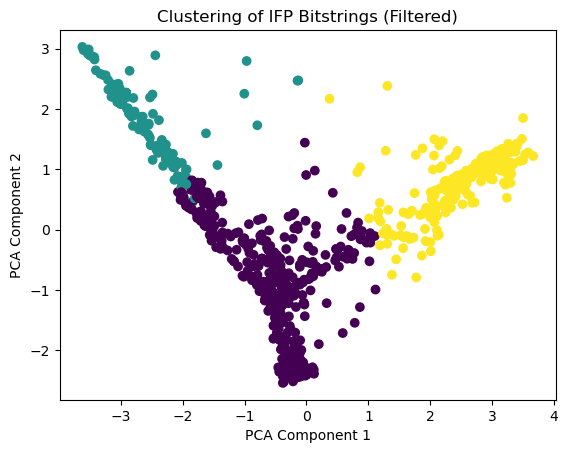

In [8]:
import requests
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to fetch partner pairs from the API
def fetch_partner_pairs(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()  # Returns a list of dictionaries
    else:
        raise Exception(f"Error fetching data: {response.status_code}")

# Fetch partner pairs data
partner_pairs_url = "https://chemopar-db.net/api/partner__pair_list/"
partner_pairs = fetch_partner_pairs(partner_pairs_url)

# Create a mapping of chemokinepartnerpair_id to chemokine_chain and partner_chain
chain_mapping = {}
for pair in partner_pairs:
    chemokine_id = pair['id']
    chain_mapping[chemokine_id] = {
        'chemokine_chain': pair['chemokine_chain'],
        'partner_chain': pair['partner_chain']
    }

# The base URL for the API
url = "https://chemopar-db.net/api/interactions_IFPs/"

try:
    # Make the GET request
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        print("Data fetched successfully.")
    else:
        print(f"Error: {response.status_code}")
except Exception as e:
    print(f"An error occurred: {e}")

# Annotate chemokinepartnerpair_ids based on chain comparison and collect those with the same chain
ids_with_same_chain = set()

for item in data:
    partner_id = item['chemokinepartnerpair_id']
    if partner_id in chain_mapping:
        chemokine_chain = chain_mapping[partner_id]['chemokine_chain']
        partner_chain = chain_mapping[partner_id]['partner_chain']
        
        # Check if chains are the same
        if chemokine_chain == partner_chain:
            ids_with_same_chain.add(partner_id)
            item['same_chain'] = True
        else:
            item['same_chain'] = False

# Filter out entries with the same chain
filtered_data = [item for item in data if item['chemokinepartnerpair_id'] not in ids_with_same_chain]

# Output the filtered data
#for item in filtered_data:
#    print(f"ID: {item['chemokinepartnerpair_id']}, Same Chain: {item['same_chain']}")

# Step 1: Convert bitstrings to vectors from filtered data
def bitstring_to_vector(bitstring):
    return [int(bit) for bit in bitstring]

# Extract IFP strings and convert them to vectors for filtered data
vectors = [bitstring_to_vector(item['ifp_string']) for item in filtered_data]

# Step 2: Choose the number of clusters (K)
k = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans to the filtered data
kmeans.fit(vectors)

# Get the cluster labels (which cluster each point belongs to)
labels = kmeans.labels_

# Step 3: Optionally reduce dimensionality for visualization
pca = PCA(n_components=2)  # Reduce to 2D for plotting
reduced_vectors = pca.fit_transform(vectors)

# Plotting the clusters
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=labels, cmap='viridis')
plt.title('Clustering of IFP Bitstrings (Filtered)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Output the clusters for filtered data
#for i, item in enumerate(filtered_data):
#    print(f"ID: {item['chemokinepartnerpair_id']}, Cluster: {labels[i]}")

Data fetched successfully.


/opt/conda/envs/python3_env/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/envs/python3_env/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


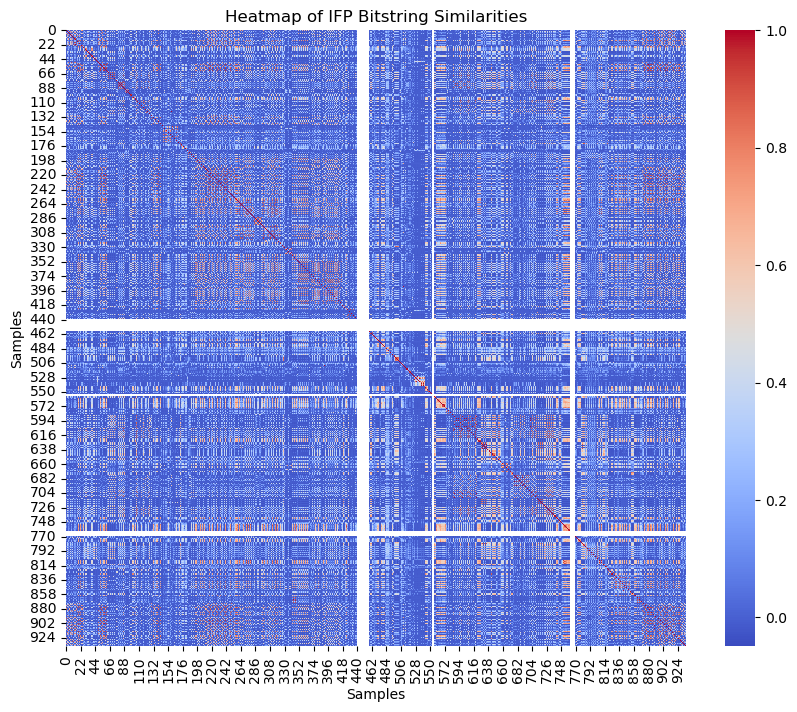

ID: 655, Cluster: 0
ID: 656, Cluster: 0
ID: 657, Cluster: 0
ID: 658, Cluster: 0
ID: 659, Cluster: 2
ID: 661, Cluster: 0
ID: 662, Cluster: 0
ID: 663, Cluster: 2
ID: 664, Cluster: 0
ID: 666, Cluster: 0
ID: 667, Cluster: 2
ID: 669, Cluster: 0
ID: 671, Cluster: 0
ID: 672, Cluster: 0
ID: 674, Cluster: 0
ID: 675, Cluster: 2
ID: 676, Cluster: 0
ID: 677, Cluster: 0
ID: 679, Cluster: 0
ID: 680, Cluster: 2
ID: 681, Cluster: 0
ID: 682, Cluster: 0
ID: 684, Cluster: 2
ID: 685, Cluster: 0
ID: 687, Cluster: 2
ID: 688, Cluster: 0
ID: 690, Cluster: 2
ID: 693, Cluster: 2
ID: 694, Cluster: 1
ID: 695, Cluster: 2
ID: 697, Cluster: 0
ID: 699, Cluster: 2
ID: 700, Cluster: 1
ID: 702, Cluster: 2
ID: 703, Cluster: 1
ID: 704, Cluster: 0
ID: 706, Cluster: 2
ID: 707, Cluster: 0
ID: 709, Cluster: 2
ID: 710, Cluster: 0
ID: 712, Cluster: 2
ID: 713, Cluster: 1
ID: 715, Cluster: 2
ID: 716, Cluster: 1
ID: 717, Cluster: 0
ID: 719, Cluster: 1
ID: 721, Cluster: 1
ID: 722, Cluster: 0
ID: 723, Cluster: 0
ID: 727, Cluster: 0


In [9]:
import requests
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Function to fetch partner pairs from the API
def fetch_partner_pairs(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()  # Returns a list of dictionaries
    else:
        raise Exception(f"Error fetching data: {response.status_code}")

# Fetch partner pairs data
partner_pairs_url = "https://chemopar-db.net/api/partner__pair_list/"
partner_pairs = fetch_partner_pairs(partner_pairs_url)

# Create a mapping of chemokinepartnerpair_id to chemokine_chain and partner_chain
chain_mapping = {}
for pair in partner_pairs:
    chemokine_id = pair['id']
    chain_mapping[chemokine_id] = {
        'chemokine_chain': pair['chemokine_chain'],
        'partner_chain': pair['partner_chain']
    }

# The base URL for the API
url = "https://chemopar-db.net/api/interactions_IFPs/"

try:
    # Make the GET request
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        print("Data fetched successfully.")
    else:
        print(f"Error: {response.status_code}")
except Exception as e:
    print(f"An error occurred: {e}")

# Annotate chemokinepartnerpair_ids based on chain comparison and collect those with the same chain
ids_with_same_chain = set()

for item in data:
    partner_id = item['chemokinepartnerpair_id']
    if partner_id in chain_mapping:
        chemokine_chain = chain_mapping[partner_id]['chemokine_chain']
        partner_chain = chain_mapping[partner_id]['partner_chain']
        
        # Check if chains are the same
        if chemokine_chain == partner_chain:
            ids_with_same_chain.add(partner_id)
            item['same_chain'] = True
        else:
            item['same_chain'] = False

# Filter out entries with the same chain
filtered_data = [item for item in data if item['chemokinepartnerpair_id'] not in ids_with_same_chain]

# Step 1: Convert bitstrings to vectors from filtered data
def bitstring_to_vector(bitstring):
    return [int(bit) for bit in bitstring]

# Extract IFP strings and convert them to vectors for filtered data
vectors = [bitstring_to_vector(item['ifp_string']) for item in filtered_data]

# Step 2: Choose the number of clusters (K)
k = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans to the filtered data
kmeans.fit(vectors)

# Get the cluster labels (which cluster each point belongs to)
labels = kmeans.labels_

# Step 3: Create a DataFrame for heatmap visualization
import pandas as pd

# Create a DataFrame to hold the similarity matrix
similarity_matrix = np.corrcoef(vectors)
df_similarity = pd.DataFrame(similarity_matrix)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_similarity, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Heatmap of IFP Bitstring Similarities')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()

# Output the clusters for filtered data
for i, item in enumerate(filtered_data):
    print(f"ID: {item['chemokinepartnerpair_id']}, Cluster: {labels[i]}")


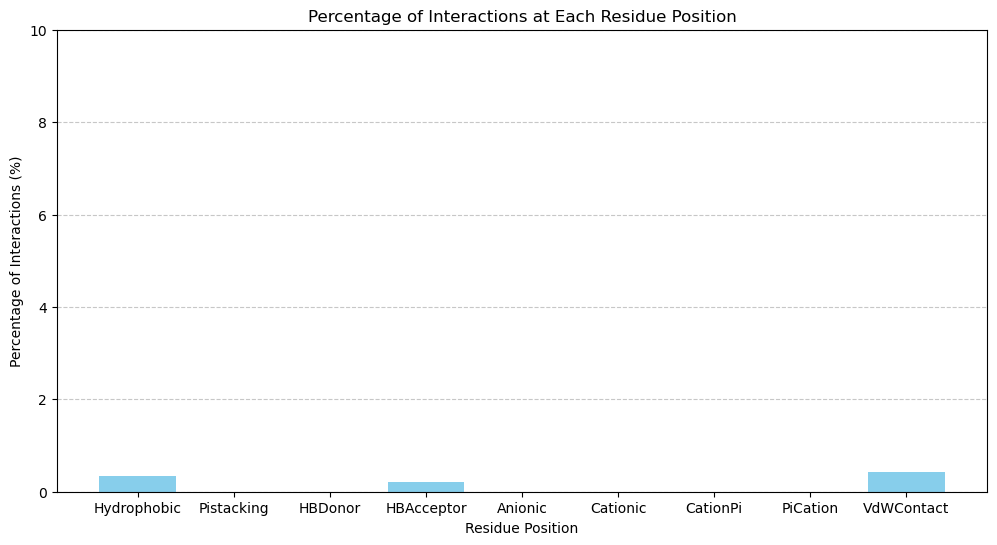

In [15]:
import requests
import numpy as np
import matplotlib.pyplot as plt

# Function to fetch IFP data from the API
def fetch_ifp_data(url):
    try:
        # Make the GET request
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            return response.json()
        else:
            print(f"Error fetching data: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Function to parse IFP bitstrings and return interaction counts for each position
def count_interactions(data):
    # Initialize interaction counts for 9 positions
    interaction_counts = np.zeros(9)  # For positions 1-9

    for item in data:
        if 'ifp_string' in item:
            bitstring = item['ifp_string']
            # Only check the first 9 positions
            for position in range(min(len(bitstring), 9)):  # Ensure we don't exceed the length
                if bitstring[position] == '1':
                    interaction_counts[position] += 1

    return interaction_counts

# Function to calculate the percentage of interactions at each position
def calculate_percentage(interaction_counts, total_ifps):
    return (interaction_counts / total_ifps) * 100

# Fetch IFP data
url = "https://chemopar-db.net/api/interactions_IFPs/"
data = fetch_ifp_data(url)

if data:
    # Count interactions
    interaction_counts = count_interactions(data)

    # Calculate total number of IFPs
    total_ifps = len(data)

    # Calculate percentages
    percentages = calculate_percentage(interaction_counts, total_ifps)

    # Define residue positions and their interaction types
    residue_positions = list(range(1, len(percentages) + 1))
    interaction_types = [
        "Hydrophobic",
        "Pistacking",
        "HBDonor",
        "HBAcceptor",
        "Anionic",
        "Cationic",
        "CationPi",
        "PiCation",
        "VdWContact"
    ]

    # Plotting the results in a bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(residue_positions, percentages, color='skyblue')
    plt.title('Percentage of Interactions at Each Residue Position')
    plt.xlabel('Residue Position')
    plt.ylabel('Percentage of Interactions (%)')
    plt.xticks(residue_positions, interaction_types)  # Set x-ticks to match residue interaction types
    plt.ylim(0, 10)  # Set y-axis limit from 0 to 100%
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


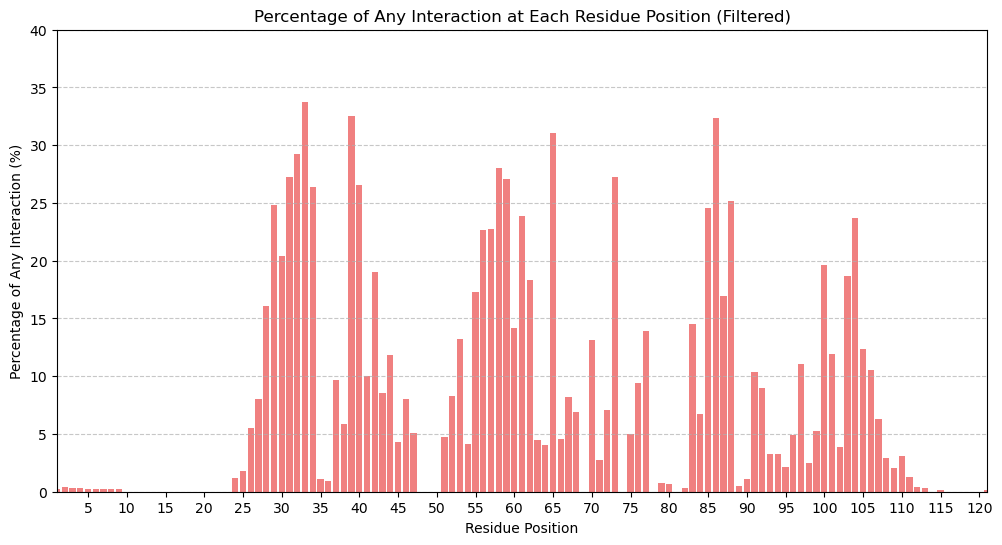

In [29]:
import requests
import numpy as np
import matplotlib.pyplot as plt

# Function to fetch IFP data from the API
def fetch_ifp_data(url):
    try:
        # Make the GET request
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            return response.json()
        else:
            print(f"Error fetching data: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Function to count interactions at each residue position
def count_residue_interactions(data):
    num_residues = len(data[0]['ifp_string']) // 9  # Calculate the number of residues based on string length
    interaction_counts = np.zeros(num_residues)  # To count interactions for each residue

    for item in data:
        if 'ifp_string' in item:
            bitstring = item['ifp_string']
            # Check each residue's 9-bit segment
            for residue in range(num_residues):
                segment = bitstring[residue * 9:(residue + 1) * 9]  # Get 9 bits for the residue
                if '1' in segment:  # Check if there's any interaction
                    interaction_counts[residue] += 1

    return interaction_counts

# Function to calculate the percentage of interactions at each residue
def calculate_percentage(interaction_counts, total_ifps):
    return (interaction_counts / total_ifps) * 100

# Function to fetch partner pairs from the API
def fetch_partner_pairs(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()  # Returns a list of dictionaries
    else:
        raise Exception(f"Error fetching data: {response.status_code}")

# Main execution starts here

# Fetch partner pairs data
partner_pairs_url = "https://chemopar-db.net/api/partner__pair_list/"
partner_pairs = fetch_partner_pairs(partner_pairs_url)

# Create a mapping of chemokinepartnerpair_id to chemokine_chain and partner_chain
chain_mapping = {}
for pair in partner_pairs:
    chemokine_id = pair['id']
    chain_mapping[chemokine_id] = {
        'chemokine_chain': pair['chemokine_chain'],
        'partner_chain': pair['partner_chain']
    }

# Fetch IFP data
url = "https://chemopar-db.net/api/interactions_IFPs/"
data = fetch_ifp_data(url)

if data:
    # Annotate chemokinepartnerpair_ids based on chain comparison and collect those with the same chain
    ids_with_same_chain = set()

    for item in data:
        partner_id = item['chemokinepartnerpair_id']
        if partner_id in chain_mapping:
            chemokine_chain = chain_mapping[partner_id]['chemokine_chain']
            partner_chain = chain_mapping[partner_id]['partner_chain']
            
            # Check if chains are the same
            if chemokine_chain == partner_chain:
                ids_with_same_chain.add(partner_id)
                item['same_chain'] = True
            else:
                item['same_chain'] = False

    # Filter out entries with the same chain
    filtered_data = [item for item in data if item['chemokinepartnerpair_id'] not in ids_with_same_chain]

    # Count interactions for residues from filtered data
    interaction_counts = count_residue_interactions(filtered_data)

    # Calculate total number of IFPs
    total_ifps = len(filtered_data)

    # Calculate percentages for any interactions
    percentages = calculate_percentage(interaction_counts, total_ifps)

    # Define residue positions
    residue_positions = list(range(1, len(interaction_counts) + 1))

    # Plotting the results in a bar plot for any interactions
    plt.figure(figsize=(12, 6))
    plt.bar(residue_positions, percentages, color='lightcoral')
    plt.title('Percentage of Any Interaction at Each Residue Position (Filtered)')
    plt.xlabel('Residue Position')
    plt.ylabel('Percentage of Any Interaction (%)')
    
    # Set x-ticks to show only every fifth position
    plt.xticks(np.arange(5, len(interaction_counts) + 1, 5))  # Show every fifth residue position starting from 1
    plt.xlim(1, len(interaction_counts))  # Set x-axis limits
    plt.ylim(0, 40)  # Set y-axis limit from 0 to 100%
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
